# Introduction and Project Objectives

This project aims to perform Sentiment Analysis on customer reviews of Womens Clothing. By analyzing review text, we intend to understand which aspects (positive or negative) customers emphasize, and to build reliable classification models for predicting “recommend” vs. “not recommend” of each product.

## 1.1. Project Motivation
- Gain insights into customer sentiment and improve product quality.  
- Help the product team quickly identify strengths and weaknesses.

## 1.2. Dataset Description
- The dataset includes the following key columns:  
  - `review_id`: Unique identifier for each review  
  - `review_text`: The textual feedback from the customer  
  - `rating`: Numerical rating (1–5) given by the customer  
  - `recommended`: Text label indicating recommend/not recommend  
  - `helpfulness`: Percentage of users who found this review helpful  
  - … (any additional fields)  
- Approximate number of rows: ~25,000 reviews.

## 1.3. Project Scope and High-Level Workflow
The project will proceed in these major steps:  
1. Loading & Initial Inspection  
2. Data Cleaning & Descriptive Statistics  
3. Exploratory Data Analysis (EDA)
4. Deep Learning Models ( DistilBERT )  
5. Final Evaluation & Comparison  
6. Model Saving & Deployment (optional)  
7. Documentation & Next Steps

## 1.4. Tools and Technologies Used
- **Python 3.8**  
- **Pandas, NumPy** for data manipulation  
- **Scikit-learn** for traditional machine learning models  
- **NLTK** for text preprocessing  
- **TensorFlow / PyTorch** for LSTM and BERT modeling  
- **Matplotlib, Seaborn** for data visualization  
- **WordCloud** for frequent-term visualization   


## Table of Contents

1. [Introduction and Project Objectives](#introduction-and-project-objectives)  
   1.1. [1.1. Project Motivation](#11-project-motivation)  
   1.2. [1.2. Dataset Description](#12-dataset-description)  
   1.3. [1.3. Project Scope and High-Level Workflow](#13-project-scope-and-high-level-workflow)  
   1.4. [1.4. Tools and Technologies Used](#14-tools-and-technologies-used)  
       - [1. **Key Driver of Recommendations**](#1-key-driver-of-recommendations)  
       - [2. **Age Neutrality**](#2-age-neutrality)  
       - [3. **Feedback Paradox**](#3-feedback-paradox)  
       - [4. **Dominant Relationship**](#4-dominant-relationship)  

2. [Analysis of the Chart: **"Distribution of Word Counts in Text by Label"**](#analysis-of-the-chart-distribution-of-word-counts-in-text-by-label)  
   2.1. [Key Observations:](#key-observations)  
       - [1. **What does "Frequency" represent here?**](#1-what-does-frequency-represent-here)  
       - [2. **Axes Interpretation:**](#2-axes-interpretation)  
       - [3. **Insights from the Chart:**](#3-insights-from-the-chart)  
       - [5. **Example Interpretation:**](#5-example-interpretation)  
   2.2. [1. Fit & Sizing Issues](#1-fit-sizing-issues)  
   2.3. [2. Material & Quality Issues](#2-material-quality-issues)  
   2.4. [3. Design & Appearance Issues](#3-design-appearance-issues)  
   2.5. [4. Overall Negative Feedback](#4-overall-negative-feedback)  
   2.6. [Analysis](#analysis)  

3. [Data Cleaning and Dataset Preparation](#data-cleaning-and-dataset-preparation)  
   3.1. [Dropping Unnecessary Columns](#dropping-unnecessary-columns)  
   3.2. [Handling Duplicates and Missing Values](#handling-duplicates-and-missing-values)  
   3.3. [Descriptive Statistics for Numeric Features](#descriptive-statistics-for-numeric-features)  
   3.4. [Train/Test Split](#train-test-split)  
   3.5. [Addressing Class Imbalance (Undersampling & Oversampling)](#addressing-class-imbalance-undersampling--oversampling)  

4. [Exploratory Data Analysis (EDA) and Outliers]

5. [Text Feature Engineering](#text-feature-engineering)  
   5.1. [Review Text Cleaning](#review-text-cleaning)  
   5.2. [Tokenization & Stopwords Removal](#tokenization--stopwords-removal)  
   5.3. [Advanced Text Preprocessing for Deep Learning]  
   5.4. [WordCloud Visualization](#wordcloud-visualization)  

7. [Deep Learning Models (DistilBert)](#deep-learning-models-DistilBert)     
   7.1. [DistilBert Customization and Fine-Tuning](#bert-fine-tuning)  

6. [model-customization-and-hyperparameter-tuning]  
   6.1. [Final Training & Model Saving](#final-training--model-saving)  
   6.2. [Evaluation Metrics & ROC Curve](#evaluation-metrics--roc-curve)  
  

7. [Error Analysis & Interpretability](#error-analysis--interpretability)  
   7.1. [False Positives & False Negatives Review](#false-positives--false-negatives-review)  

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import demoji
import nltk
import sklearn
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import confusion_matrix

In [1]:
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.5 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
df = df.drop(columns=['Unnamed: 0', 'Clothing ID'])

In [6]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(23486, 9)

NANs
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               2

In [7]:
df = df.dropna(subset=['Review Text'])
print(df.isnull().sum())

Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64


In [8]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  2


In [9]:
df.apply(lambda x : len(x.unique()))

,0
Age,77
Title,13993
Review Text,22634
Rating,5
Recommended IND,2
Positive Feedback Count,82
Division Name,4
Department Name,7
Class Name,21


In [10]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering', nan,
       'Casual bottoms', 'Chemises'], dtype=object)

In [11]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [12]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [13]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

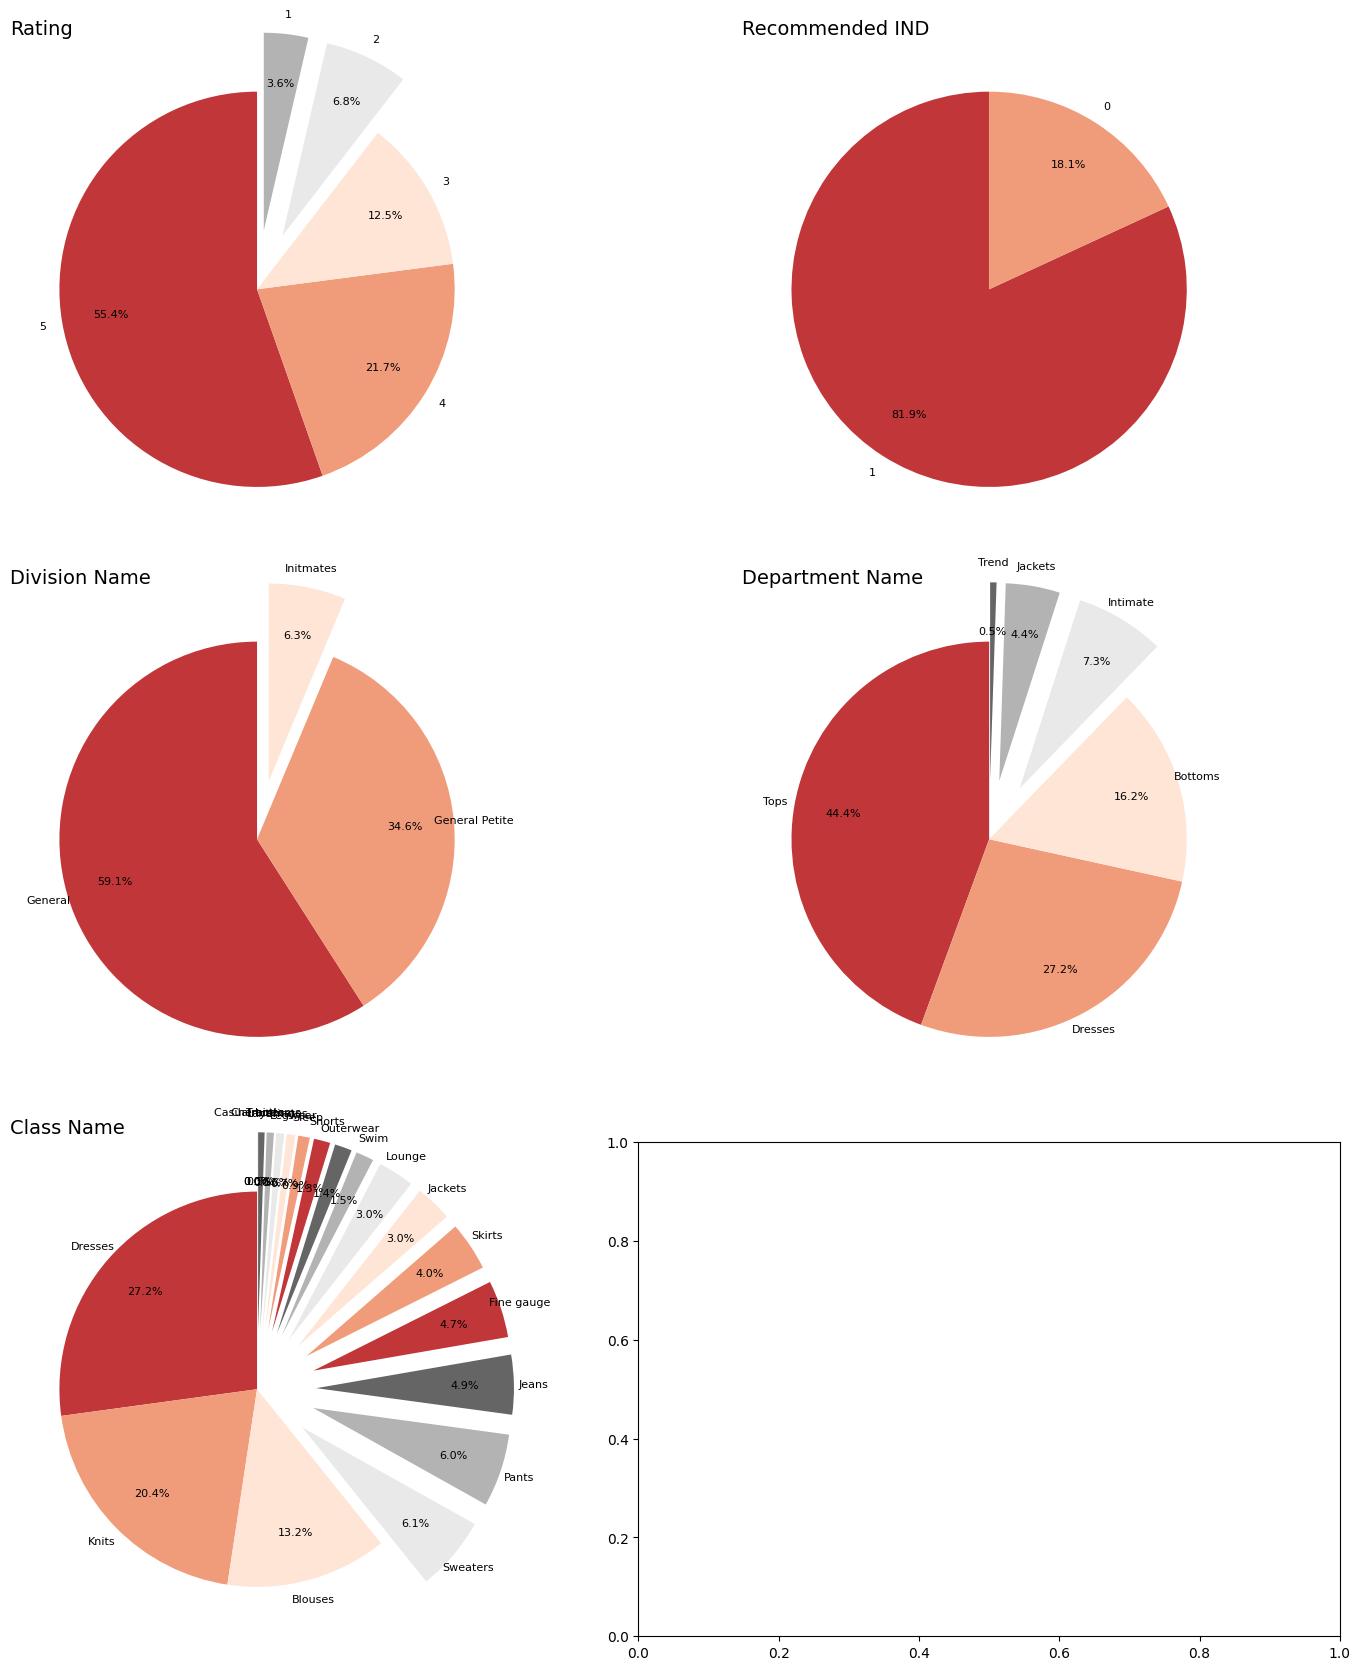

In [14]:
fig, ax = plt.subplots(figsize=(15, 17), nrows=3, ncols=2)
sns.set_palette("RdGy")
columns = ['Rating', 'Recommended IND','Division Name', 'Department Name',
       'Class Name']
titles = ['Rating', 'Recommended IND','Division Name', 'Department Name',
       'Class Name']
def get_explode(values, threshold=10):
    total = sum(values)
    return [0.3 if (v / total) * 100 < threshold else 0 for v in values]

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    values = df[column].value_counts()
    explode = get_explode(values)
    values.plot.pie(
        autopct='%1.1f%%', ax=ax[row, col], startangle=90,
        textprops={'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center'},
        pctdistance=0.75,
        explode=explode
    )
    ax[row, col].set_title(titles[i], fontsize=14, loc='left')
    ax[row, col].set_ylabel('')
plt.tight_layout(pad=2.0)
plt.show()

In [15]:
df.describe().T.style.background_gradient(cmap='RdGy', axis=1)

,count,mean,std,min,25%,50%,75%,max
Age,22641.000000,43.280376,12.326980,18.000000,34.000000,41.000000,52.000000,99.000000
Rating,22641.000000,4.183561,1.115762,1.000000,4.000000,5.000000,5.000000,5.000000
Recommended IND,22641.000000,0.818868,0.385136,0.000000,1.000000,1.000000,1.000000,1.000000
Positive Feedback Count,22641.000000,2.630582,5.786164,0.000000,0.000000,1.000000,3.000000,122.000000


In [16]:
print(df.dtypes)

Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [17]:
hf = df.copy()

In [18]:
hf = hf[['Age','Rating','Recommended IND','Positive Feedback Count']]
hf

,Age,Rating,Recommended IND,Positive Feedback Count
0,33,4,1,0
1,34,5,1,4
2,60,3,0,0
3,50,5,1,0
4,47,5,1,6
...,...,...,...,...
23481,34,5,1,0
23482,48,3,1,0
23483,31,3,0,1
23484,28,3,1,2


In [19]:
hf.corr(numeric_only=True).T.style.background_gradient(cmap='jet', axis=1)

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.029962,0.034208,0.040850
Rating,0.029962,1.000000,0.792568,-0.060984
Recommended IND,0.034208,0.792568,1.000000,-0.065923
Positive Feedback Count,0.040850,-0.060984,-0.065923,1.000000


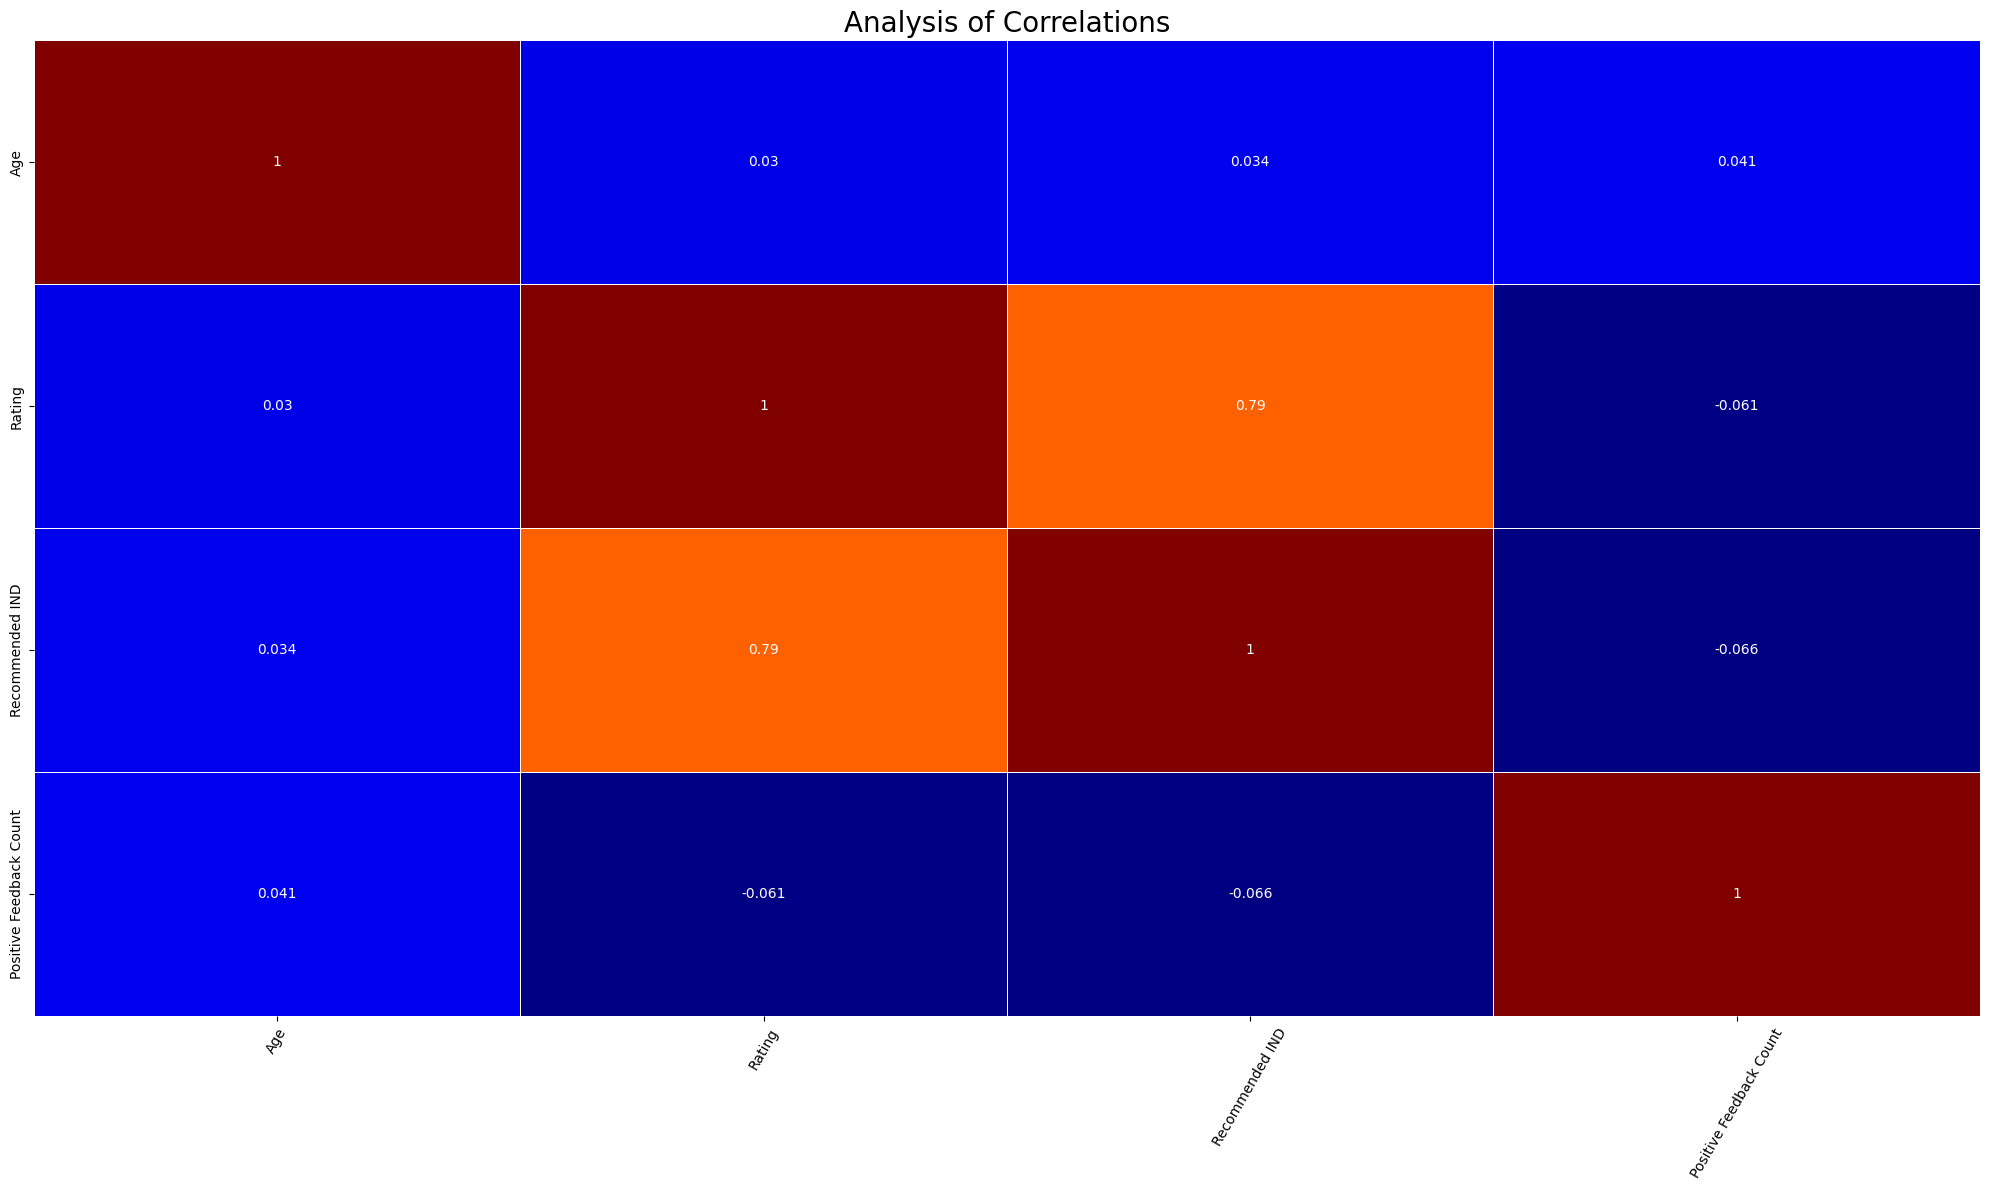

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(hf.corr(numeric_only=True), cmap="jet", annot=True, linewidths=.6 , cbar = False)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

### 1. **Key Driver of Recommendations**
- **Rating ↔ Recommendation**  
  Strong correlation \[r = 0.79\] - Products with higher ratings are **79% more likely** to be recommended.

### 2. **Age Neutrality**
- **Age ↔ Rating** \[r = 0.03\]  
- **Age ↔ Recommendations** \[r = 0.034\]  
  No meaningful relationship - Customer age doesn't influence product evaluations or recommendation patterns.

### 3. **Feedback Paradox**
- **Ratings ↔ Feedback** \[r = -0.061\]  
- **Recommendations ↔ Feedback** \[r = -0.066\]  
  Counterintuitive pattern - Popular products with more feedback tend to have slightly lower ratings/recommendations.

### 4. **Dominant Relationship**
- Rating-Recommendation link is **12.9x stronger** than next strongest correlation (Age-Rating), making it the central dynamic in this dataset.


Focus improvement efforts on:  
✅ Enhancing product ratings (primary recommendation driver)  
⚠️ Monitoring feedback patterns (unexpected negative correlations)


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

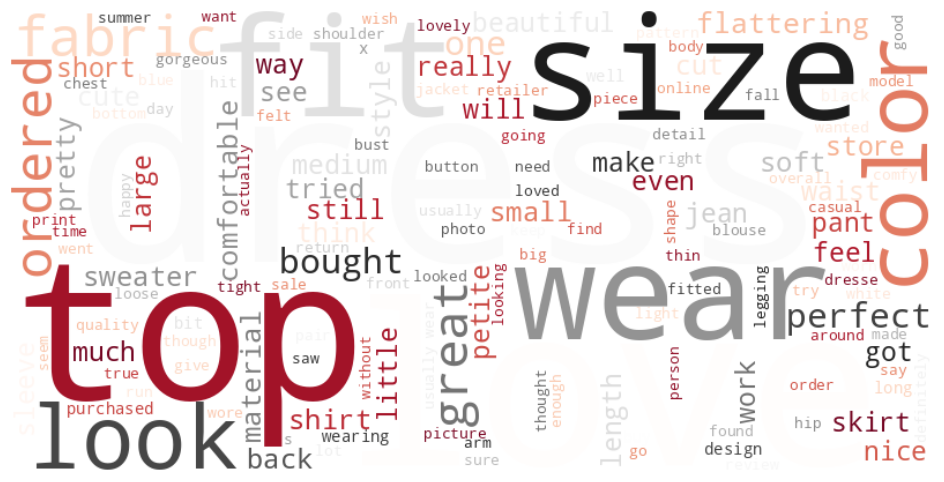

In [21]:
from wordcloud import WordCloud, STOPWORDS
# Extract the "review_text" column from the data frame
review_text = df['Review Text'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn'", "didn't" ])  # Add any other stopwords you'd like to exclude

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=150,
                       background_color='white',
                       colormap='RdGy',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [22]:
dr = df.copy()

In [23]:
dr = df[["Recommended IND","Rating" , "Review Text"]]
dr

,Recommended IND,Rating,Review Text
0,1,4,Absolutely wonderful - silky and sexy and comf...
1,1,5,Love this dress! it's sooo pretty. i happene...
2,0,3,I had such high hopes for this dress and reall...
3,1,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,5,This shirt is very flattering to all due to th...
...,...,...,...
23481,1,5,I was very happy to snag this dress at such a ...
23482,1,3,"It reminds me of maternity clothes. soft, stre..."
23483,0,3,"This fit well, but the top was very see throug..."
23484,1,3,I bought this dress for a wedding i have this ...


Class distribution:
 Recommended IND
1    18540
0     4101
Name: count, dtype: int64


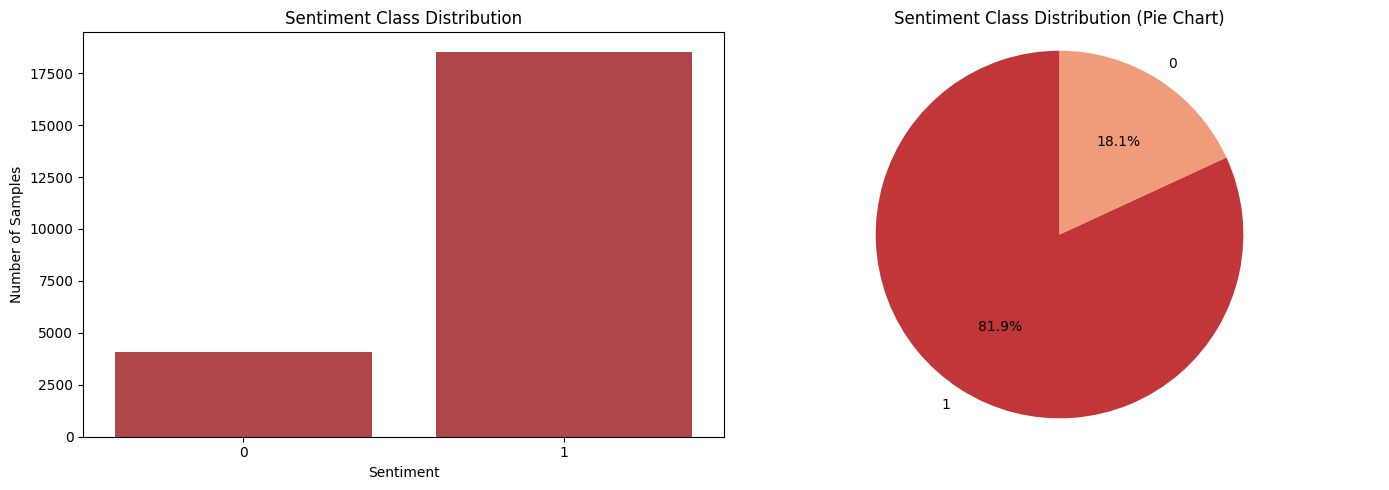

In [24]:
sns.set_palette("RdGy")
class_counts = dr['Recommended IND'].value_counts()
print("Class distribution:\n", class_counts)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax[0])
ax[0].set_title("Sentiment Class Distribution")
ax[0].set_xlabel("Sentiment")
ax[0].set_ylabel("Number of Samples")
ax[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')
ax[1].set_title("Sentiment Class Distribution (Pie Chart)")
plt.tight_layout()
plt.show()

<ipython-input-25-0aff942a871c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['text_word_count'] = dr['Review Text'].apply(lambda x: len(x.split()))


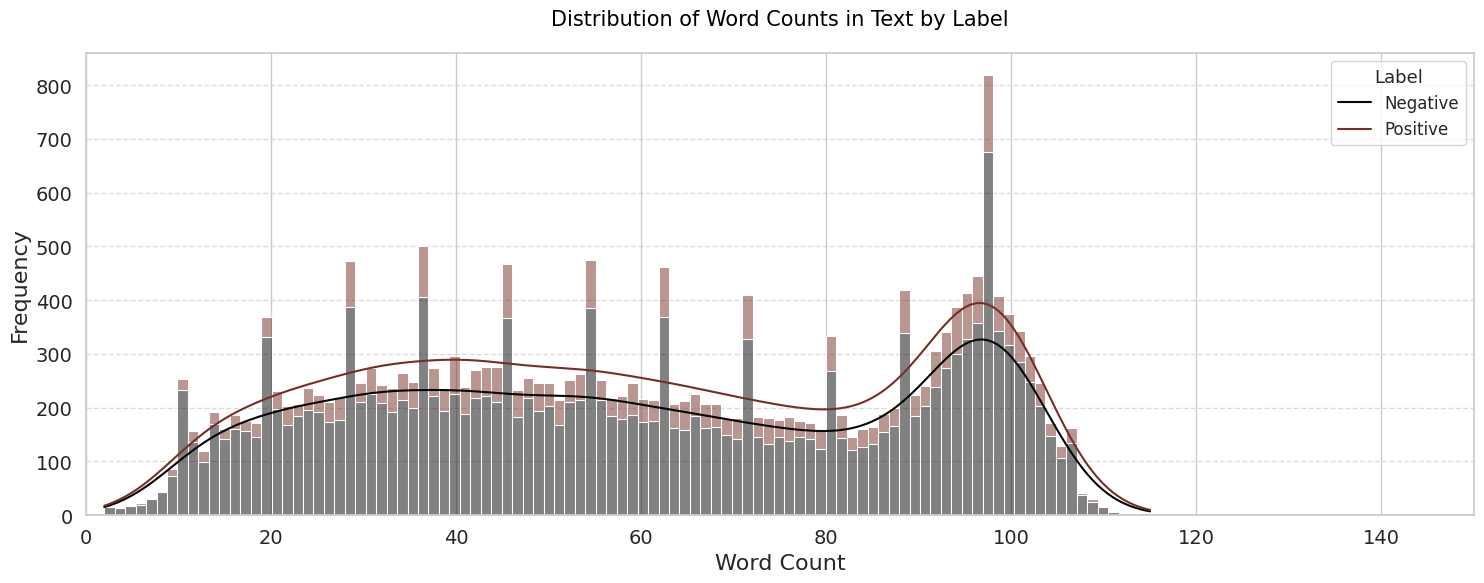

In [25]:
# Add a new column 'text_word_count' that contains the word count for each text
dr['text_word_count'] = dr['Review Text'].apply(lambda x: len(x.split()))
# Set the seaborn style
sns.set(style="whitegrid")
# Define custom colors for each class
custom_colors = {0: '#772E25', 1 : '#050505'}  # Red for negative, black for positive
# Plot the distribution of word counts, differentiated by labels
plt.figure(figsize=(15, 6), dpi=100)
sns.histplot(data=dr, x='text_word_count', bins=100, hue='Recommended IND', multiple="stack", palette=custom_colors, kde=True)
# Set title and labels
plt.title("Distribution of Word Counts in Text by Label", fontsize=15, pad=20, color='black')
plt.xlabel("Word Count", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Label", labels=[ 'Negative' , 'Positive'], fontsize=12, title_fontsize='13')
# Set x-axis limits
plt.xlim(0, 150)  # Set limits for the x-axis
plt.tight_layout()
plt.show()

# Analysis of the Chart: **"Distribution of Word Counts in Text by Label"**

## Key Observations:
### 1. **What does "Frequency" represent here?**
   - **Frequency** refers to the **number of text samples** (e.g., reviews, comments, or documents) that fall into specific **word count ranges**, grouped by their sentiment labels (`Positive` or `Negative`).  
   - Example: A bar for `Positive` at `100 words` with a frequency of `50` means **50 positive texts** contain **exactly 100 words**.

---

### 2. **Axes Interpretation:**
   - **X-axis (Word Count):** Represents the **length of texts** in terms of word count (e.g., `100`, `120` words).  
   - **Y-axis (Frequency):** Shows **how many texts** exist for each word count category within each label (`Positive`/`Negative`).  

---

### 3. **Insights from the Chart:**
   - **Distribution Comparison:**  
     - Compares how **text length** varies between **positive** and **negative** sentiment labels.  
     - Example: If `Negative` texts peak at `120 words`, it suggests negative feedback tends to be longer.  
   - **Dominant Word Counts:**  
     - Identifies the **most common text length** for each sentiment (e.g., `Positive` texts cluster around `100 words`).  
---

### 5. **Example Interpretation:**
If the chart shows:  
- **`Positive`**: High frequency at `100 words`.  
This implies:  
- Positive feedback is often concise.  

---

**Note:** Replace hypothetical numbers (e.g., `50`, `100`) with actual values from your chart for precise analysis.  

In [26]:
dr[dr["text_word_count"] == 100] ["Review Text"]

,Review Text
58,"I got this in the petite length, size o, and i..."
84,I received this shirt in my typical xs and it ...
164,"I bought this and like other reviews, agree th..."
212,I was so excited about the arrival of my maza ...
482,"I had it on my wish list for a long time, not ..."
...,...
22982,After reading the other reviews i still took a...
23014,I agree with the other reviews that the side s...
23157,Agree with other reviewers : this dress is sur...
23194,I thought this coat was absolutely unique when...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


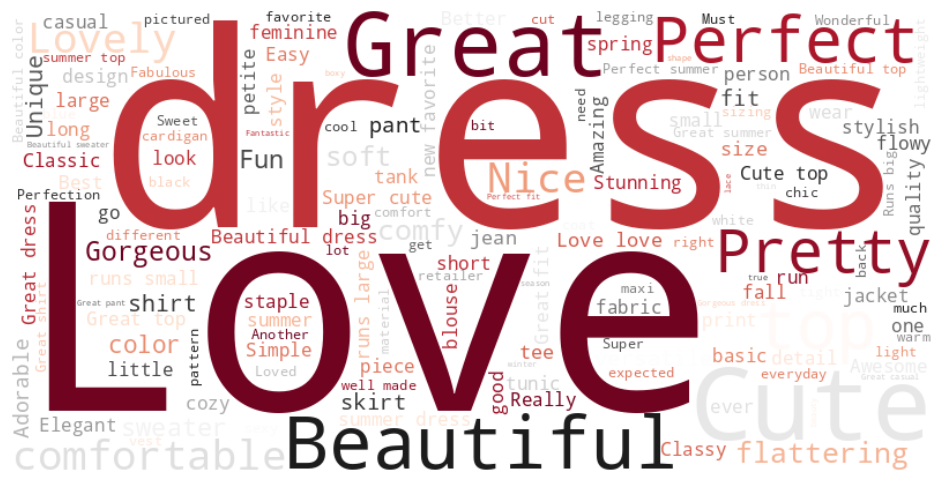

In [27]:
# Positive
positive = df[df['Recommended IND']==1]
from nltk.corpus import stopwords
# Ensure stopwords are downloaded
nltk.download('stopwords')
# Load English stopwords
stopwords_set = set(stopwords.words('english'))
# Add additional stopwords
stopwords_set.update(["received", "day", "make", "feel", "leave", "buy","product", "nan", "work", "works", "stuff","br", "href", "don t", "didn t", "don't", "doesn'", "didn't" ])
pos = " ".join(review_title for review_title in positive["Title"].apply(str) )

wordcloud2 = WordCloud(stopwords=stopwords_set, max_words=150,
                       background_color='white',
                       colormap='RdGy',
                       width=800,
                       height=400).generate(pos)

plt.figure(figsize=(12, 6))  # Modify figure size
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

1. Customers frequently mentioned the product’s color and seasonal suitability

   * **Examples:** Beautiful color, black, blue, white, winter, spring, fall, season , summer dress .

2. They often commented on appearance and overall style

   * **Examples:** pictured, sizing, basic, casual, classy, fun, diffrent, stylish, unique .

3. Reviewers highlighted fabric quality and comfort

   * **Examples:** fabric, quality, comfy, comfortable, flowly, soft .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


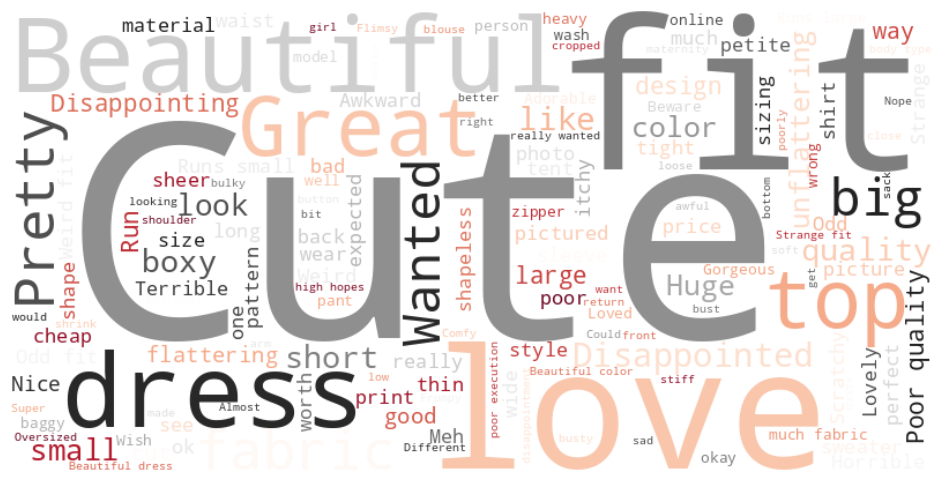

In [28]:
# Positive
Negative = df[df['Recommended IND']==0]
from nltk.corpus import stopwords
# Ensure stopwords are downloaded
nltk.download('stopwords')
# Load English stopwords
stopwords_set = set(stopwords.words('english'))
# Add additional stopwords
stopwords_set.update(["received", "day", "make", "feel", "leave", "buy","product", "nan", "work", "works", "stuff","br", "href", "don t", "didn t", "don't", "doesn'", "didn't" ])
neg = " ".join(review_title for review_title in Negative["Title"].apply(str) )

wordcloud2 = WordCloud(stopwords=stopwords_set, max_words=150,
                       background_color='white',
                       colormap='RdGy',
                       width=800,
                       height=400).generate(neg)

plt.figure(figsize=(12, 6))  # Modify figure size
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1. Fit & Sizing Issues

* **Big, Huge, Large**
* **Small, Tight, Short**
* **Boxy, Tent, Baggy**
* **Runs large, Runs small**
* **Weird fit, Odd fit**
* **Unflattering, Shapeless**

## 2. Material & Quality Issues

* **Poor quality**
* **Cheap**
* **Flimsy**
* **Stiff**
* **Itchy, Scratchy**

## 3. Design & Appearance Issues

* **Strange**
* **Awkward**
* **Ugly**
* **Wrong** (in reference to color or style)

## 4. Overall Negative Feedback

* **Terrible**
* **Disappointed, Disappointment**
* **Bad**

---

## Analysis

1. **Sizing Frustrations Dominate**

   * The largest group of complaints revolves around poor fit: items that run too large or too small, unexpected silhouettes (boxy, tent-like), and generally unflattering shapes. This suggests sizing charts or garment patterns aren’t matching customer expectations, leading to returns or one-time use.

2. **Quality Perceptions Are Key**

   * Descriptors like “cheap,” “flimsy,” “stiff,” and “scratchy” point to mismatches between advertised fabric quality and the actual feel of the garment. If a product is marketed as “premium” or “soft,” but arrives feeling low-end or uncomfortable, shoppers feel misled.

3. **Design vs. Reality Gap**

   * Words such as “strange,” “awkward,” and “wrong” (especially about color or print) indicate that product photos or descriptions aren’t accurately conveying the final look. Even if fit and fabric are acceptable, a surprising style detail can trigger a negative reaction.

4. **Strong Negative Sentiment**

   * Terms like “terrible,” “disappointed,” and “bad” reflect overall dissatisfaction that often combines multiple issues—poor fit, cheap-feeling fabric, and design you wouldn’t actually wear.

---


In [29]:
# Distribution of reviews by sentiment
import plotly.express as px
dr['sentimentanalysis'] = dr['Recommended IND'].replace({0: 'negative', 1: 'positive'})
fig = px.histogram(dr, x='sentimentanalysis')
fig.update_traces(marker_color='maroon', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title_text='Product Sentiment',
    paper_bgcolor='white',
    plot_bgcolor='white')
fig.show()

<ipython-input-29-9c8ff96200a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['sentimentanalysis'] = dr['Recommended IND'].replace({0: 'negative', 1: 'positive'})


In [30]:
print(len(dr[dr["Recommended IND"] == 0] ) , len(dr[dr["Recommended IND"] == 1]) )

4101 18540


In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [32]:
dr

,Recommended IND,Rating,Review Text,text_word_count,sentimentanalysis
0,1,4,Absolutely wonderful - silky and sexy and comf...,8,positive
1,1,5,Love this dress! it's sooo pretty. i happene...,62,positive
2,0,3,I had such high hopes for this dress and reall...,98,negative
3,1,5,"I love, love, love this jumpsuit. it's fun, fl...",22,positive
4,1,5,This shirt is very flattering to all due to th...,36,positive
...,...,...,...,...,...
23481,1,5,I was very happy to snag this dress at such a ...,28,positive
23482,1,3,"It reminds me of maternity clothes. soft, stre...",38,positive
23483,0,3,"This fit well, but the top was very see throug...",42,negative
23484,1,3,I bought this dress for a wedding i have this ...,86,positive


In [33]:
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_res, y_res = ros.fit_resample(dr[['Review Text']], dr['Recommended IND'])

In [34]:
print(f"Negative: {len(y_res[y_res == 0])}  Positive : {len(y_res[y_res == 1])} ")

Negative: 9270  Positive : 18540 


In [35]:
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

X_res_, y_res_ = rus.fit_resample(X_res, y_res)

In [36]:
print(f"Negative: {len(y_res_[y_res_ == 0])}  Positive : {len(y_res_[y_res_ == 1])} ")

Negative: 9270  Positive : 9270 


In [37]:
dr1 = pd.DataFrame(X_res_)
dr1['label'] = y_res_
dr1

,Review Text,label
2,I had such high hopes for this dress and reall...,0
5,"I love tracy reese dresses, but this one is no...",0
10,Dress runs small esp where the zipper area run...,0
22,"First of all, this is not pullover styling. th...",0
25,"Loved the material, but i didnt really look at...",0
...,...,...
12123,Saw this on the mannequin and tried it on just...,1
12496,The sweater had a square fit it has a chiffon ...,1
17211,Great sweater for any occasion. may be dressed...,1
4066,I've been searching for a brown top/dress/tuni...,1


In [38]:
# Ensure that there are no null values in the DataFrame and display general information
def check_dataframe(df):
    # Display the number of null values in each column
    null_counts = df.isnull().sum()
    print('Nullable Values:\n', null_counts, '\n\n')
    # Display general information about the DataFrame
    print('DataFrame Info:')
    df.info()
    # Display the distribution of null values as a percentage
    total_cells = df.size
    total_missing = null_counts.sum()
    missing_percentage = (total_missing / total_cells) * 100
    print(f'\nPercentage of missing values: {missing_percentage:.2f}%')
    # Display statistics for numeric columns
    print('\nStatistical Summary of Numeric Columns:')
    print(df.describe())
check_dataframe(dr1)

Nullable Values:
 Review Text    0
label          0
dtype: int64 


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 18540 entries, 2 to 21812
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  18540 non-null  object
 1   label        18540 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 434.5+ KB

Percentage of missing values: 0.00%

Statistical Summary of Numeric Columns:
              label
count  18540.000000
mean       0.500000
std        0.500013
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [39]:
dr_train0, dr_test = train_test_split(dr1, test_size=0.20, shuffle=True, random_state= 42)
dr_train, dr_validation = train_test_split(dr_train0, test_size=0.15, random_state= 42)

In [40]:
pd.set_option('display.max_colwidth', None)
dr_train.head(10)

,Review Text,label
2440,Love the dolman sleeves and its the perfect length. throw on a cute necklace and go.,1
13347,"I was really excited to see what this looked like in person. when i unpacked this shirt i was shocked to see what how short it looked. the colors are very close to what you see online but the shirt is super boxy. i have a smaller torso and it barely came to below my waist. you can't tell by the picture but this shirt can fit at least 2 people in the width. when i tried it on, it didn't look as boxy but still a really weird cut! it was disappointing because it looks so cute online! i will be retu",0
23546,"I ordered this dress in two sizes, pxs and ps. they both arrived in a timely manner but the pxs was snagged upon arrival. there were a few other reviewers that stated the dress snagged easily but i loved the classic look of this dress so i thought i would take the chance. unfortunately i had to take both back to the store because the potential for snagging the fabric was too high even considering the sale price. also, the dress comes with a cotton slip but the slip for the pxs was tiny while the",0
4676,"I am somewhat of a perennial sale-only retailer purchaser (often even when a promo code, i don't buy full price! lol!). when i saw this top i decided it was worth it. i got the penguin print - my 2-year-old squealed when she saw me pull it out of the box! thanks, retailer, for your woodland-inspired prints that enamor my little one.\n\nmaeve tends to run big, so i went with the 00. in my opinion, it fits true to size. i probably would have liked it just a little bigger, maybe the 0 would have been bes",1
12664,"You know when you're shopping and you don't buy something you like, but later you can't stop thinking about it? that was the case with his sweater! i saw it paired with a cute top in the store so i tried it on on a whim. i'm so glad i eventually got it! it's toasty, soft, and thick with the perfect amount of quirk.",1
23316,"Bought these for the color however these just did not work for me. the 26 was too small and the 27 was baggy. i'm 5'3 and typically wear a 26. beautiful color and good denim. if you are looking for a looser fit, more of a straight leg fit...this is a good jean with a fun pop of color.",0
7130,"Love the design and style of this dress when i saw it online, however, it falls a little short once in person. it was a bit boxier than i wanted and the lines didn't make it appear as a swing dress, highlighting your figure.\n\ni wish this could have worked, however, it felt a little too unshapely.",0
9133,"Very flattering and looks much better on than on the mannequin in store. i an in between small/medium and went with medium which was looser in back and did not show any lumps or bumps. great with jeans, pencil skirts and capris .",1
24704,"This jacket is so cute and fits perfect and i love the motif. however, it deposited black linty particle all over my pants and top and the fabric was already pilling just from being on the hanger in the store. this piece will look bad/worn/old in a very short period of time. it's a big shame, because it's so perfect in every other way. i choose not to buy it. it's very expensive for the quality.",0
27404,"I love the design, that's why i'm going back for a smaller size. i bought a medium and that size was made for someone 50 lbs heavier than i. usually i'm good at choosing my size online, but not today. if you are curvy and round like me still go for a smaller size because this dress has a lot if room. also i wish more clothes would come into the stores to try on, please!",0


In [41]:
model_name = "distilbert-base-uncased"
tokenizer_BERT = DistilBertTokenizerFast.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [42]:
tokenizer = ToktokTokenizer()

In [43]:
# Set the stopword list
stopword_list = nltk.corpus.stopwords.words('english')  # Retrieves a list of common English stopwords from the NLTK library.
stop = set(stopword_list)  # Converts the list of stopwords into a set for faster lookup when filtering.

# Remove HTML tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")  # Parses the input text to handle HTML tags.
    return soup.get_text()  # Extracts and returns the plain text, stripping away any HTML formatting.

# Remove square brackets
def remove_between_square_brackets(text):
    return re.sub(r'\[.*?\]', '', text)  # Uses regex to find and remove any content between square brackets, as this often contains irrelevant information.

# Remove noise from text
def denoise_text(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""  # Return empty string for NaN or non-string inputs
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Remove special characters
def remove_special_characters(text, remove_digits=True):
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'  # Creates a regex pattern to match any character that is not a letter or whitespace, effectively removing special characters and digits.
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # This pattern allows numbers to remain in the text while still removing special characters.
    text = re.sub(pattern, '', text)  # Applies the regex pattern to the text, removing unwanted characters.
    return text  # Returns the cleaned text.

# Stem the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()  # Initializes the Porter Stemmer, which reduces words to their base or root form.
    text = ' '.join([ps.stem(word) for word in text.split()])  # Applies stemming to each word in the text and rejoins them into a single string.
    return text  # Returns the stemmed text.

# Remove stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)  # Tokenizes the input text into individual words or tokens.
    tokens = [token.strip() for token in tokens]  # Strips whitespace from each token.
    if is_lower_case:
        # If the input text is already in lowercase, filter out stopwords without converting.
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        # If the input text is not in lowercase, convert tokens to lowercase for stopword comparison.
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)  # Joins the filtered tokens back into a single string.
    return filtered_text  # Returns the cleaned text with stopwords removed.

In [44]:
def text_preprocessing_pipeline(dr, text_column='Review Text'):
    # ابتدا نویززدایی (denoise) متن
    dr[text_column] = dr[text_column].apply(denoise_text)

    # حذف اعداد با regex
    dr[text_column] = dr[text_column].str.replace(r'\d+', '', regex=True)

    # حذف فاصله‌های ابتدای و انتهای رشته
    dr[text_column] = dr[text_column].str.replace(r'^\s+|\s+$', '', regex=True)

    # تبدیل متن به حروف کوچک
    dr[text_column] = dr[text_column].str.lower()

    # حذف کاراکترهای ویژه (special characters)
    dr[text_column] = dr[text_column].apply(remove_special_characters)

    # ریشه‌یابی ساده (stemming)
    dr[text_column] = dr[text_column].apply(simple_stemmer)

    # حذف واژگان توقف (stopwords)
    dr[text_column] = dr[text_column].apply(remove_stopwords)

    return dr

In [45]:
dr_train = text_preprocessing_pipeline(dr_train, text_column='Review Text')

dr_train

,Review Text,label
2440,love dolman sleev perfect length throw cute necklac go,1
13347,wa realli excit see thi look like person unpack thi shirt wa shock see short look color veri close see onlin shirt super boxi smaller torso bare came waist cant tell pictur thi shirt fit least peopl width tri didnt look boxi still realli weird cut wa disappoint becaus look cute onlin retu,0
23546,order thi dress two size px ps arriv time manner px wa snag upon arriv review state dress snag easili love classic look thi dress thought would take chanc unfortun take back store becaus potenti snag fabric wa high even consid sale price also dress come cotton slip slip px wa tini,0
4676,somewhat perenni saleonli retail purchas often even promo code dont buy full price lol saw thi top decid wa worth got penguin print yearold squeal saw pull box thank retail woodlandinspir print enamor littl one maev tend run big went opinion fit true size probabl would like littl bigger mayb would,1
12664,know shop dont buy someth like later cant stop think wa case hi sweater saw pair cute top store tri whim im glad eventu got toasti soft thick perfect amount quirk,1
...,...,...
25047,print veri pretti fabric stiff run way big look great model aw,0
8801,detail bead wa beauti boxi way much fabric waistbust tight hip doesnt fall boxyboyfriend like grey fabric soft lighter color pictur wa hope thi would go sweater warmth casual daysbum,0
13848,purchas orang tiger print absolut love color pattern rich vibrant easili dress worn work night,1
5890,tri thi today becaus touch wa irresist soft like orang wa loud orangeand almost would prefer sort design purchas thi becaus end day suit styleit wa veri plain think could dress addit belt right necklac usual fan buy piec stand requir accessori said wa veri comfort soft,0


In [46]:
token_lens = []

for txt in dr_train["Review Text"].values:
    tokens = tokenizer_BERT.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [47]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 92


In [48]:
token_lens = np.array(token_lens)
len(token_lens)

12607

In [49]:
token_lens = np.array(token_lens)
y = np.array(np.where(token_lens > 80))
print(y.shape)
x = np.array(np.where(token_lens > 128))
x.shape

(1, 159)


(1, 0)

In [50]:
rl_train = dr_train["Review Text"].tolist()

In [51]:
len(rl_train)

12607

In [52]:
train_encoded = tokenizer_BERT(rl_train,
    padding= "max_length",
    truncation=True,
    return_tensors='tf',
    max_length=128)

In [53]:
print(train_encoded)

{'input_ids': <tf.Tensor: shape=(12607, 128), dtype=int32, numpy=
array([[  101,  2293,  2079, ...,     0,     0,     0],
       [  101, 11333,  2613, ...,     0,     0,     0],
       [  101,  2344, 16215, ...,     0,     0,     0],
       ...,
       [  101, 16405, 11140, ...,     0,     0,     0],
       [  101, 13012, 16215, ...,     0,     0,     0],
       [  101,  2387, 16215, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(12607, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}


In [54]:
dr_validation = text_preprocessing_pipeline(dr_validation, text_column='Review Text')
dr_test = text_preprocessing_pipeline(dr_test, text_column='Review Text')

In [55]:
rl_validation = dr_validation["Review Text"].tolist()
rl_test = dr_test["Review Text"].tolist()

In [76]:
y_validation = np.array(dr_validation["label"].tolist())
y_train = np.array(dr_train["label"].tolist())
y_test = np.array(dr_test["label"].tolist())

In [57]:
validation_encoded = tokenizer_BERT(rl_validation,
    padding= "max_length",
    truncation=True,
    return_tensors='tf',
    max_length=128)

In [58]:
test_encoded = tokenizer_BERT(rl_test,
    padding= "max_length",
    truncation=True,
    return_tensors='tf',
    max_length=128)

In [59]:
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [60]:
distilbert_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
train_input_ids = train_encoded["input_ids"]
train_attention_mask = train_encoded["attention_mask"]
train_input_ids = np.array(train_input_ids)
train_attention_mask = np.array(train_attention_mask)
validation_input_ids, validation_attention_mask = validation_encoded["input_ids"], validation_encoded["attention_mask"]
validation_input_ids, validation_attention_mask = np.array(validation_input_ids) , np.array(validation_attention_mask)

In [62]:
test_input_ids, test_attention_mask = test_encoded["input_ids"], test_encoded["attention_mask"]
test_input_ids, test_attention_mask = np.array(test_input_ids) , np.array(test_attention_mask)

In [ ]:
def DistilBERT(distilbert_model, max_len=128):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')


    embeddings = distilbert_model([input_ids, attention_masks]).logits
    x = keras.layers.Dropout(0.3) (embeddings)

    output = tf.keras.layers.Dense(
    1,
    activation="sigmoid",
    kernel_initializer=keras.initializers.GlorotNormal())(x)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model


In [ ]:
DB_model =DistilBERT(distilbert_model , 128)
DB_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6695501   ['input_1[0][0]',             
 e_classification (TFDistil  (loss=None, logits=(None,    0          'input_2[0][0]']             
 BertForSequenceClassificat  2),                                                                  
 ion)                         hidden_states=None, atten                                       

In [ ]:
history = DB_model.fit(
        [train_input_ids, train_attention_mask],
        y_train,
        validation_data= ([validation_input_ids,validation_attention_mask],y_validation),
        epochs=10,
        batch_size=32,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                  keras.callbacks.ModelCheckpoint("distilsentiment",monitor = 'val_loss',save_best_only=True)],
        verbose=1
    )

Epoch 1/10
394/394 [==============================] - ETA: 0s - loss: 0.5225 - binary_accuracy: 0.7516

394/394 [==============================] - 238s 506ms/step - loss: 0.5225 - binary_accuracy: 0.7516 - val_loss: 0.3746 - val_binary_accuracy: 0.8490
Epoch 2/10
394/394 [==============================] - ETA: 0s - loss: 0.3823 - binary_accuracy: 0.8373

394/394 [==============================] - 194s 492ms/step - loss: 0.3823 - binary_accuracy: 0.8373 - val_loss: 0.3383 - val_binary_accuracy: 0.8679
Epoch 3/10
394/394 [==============================] - ETA: 0s - loss: 0.3173 - binary_accuracy: 0.8673

394/394 [==============================] - 194s 492ms/step - loss: 0.3173 - binary_accuracy: 0.8673 - val_loss: 0.2930 - val_binary_accuracy: 0.8863
Epoch 4/10
394/394 [==============================] - ETA: 0s - loss: 0.2614 - binary_accuracy: 0.8932

394/394 [==============================] - 195s 494ms/step - loss: 0.2614 - binary_accuracy: 0.8932 - val_loss: 0.2860 - val_binary_accuracy: 0.8926
Epoch 5/10
394/394 [==============================] - ETA: 0s - loss: 0.2234 - binary_accuracy: 0.9070

394/394 [==============================] - 192s 489ms/step - loss: 0.2234 - binary_accuracy: 0.9070 - val_loss: 0.2677 - val_binary_accuracy: 0.9038
Epoch 6/10
394/394 [==============================] - 164s 415ms/step - loss: 0.1900 - binary_accuracy: 0.9186 - val_loss: 0.3158 - val_binary_accuracy: 0.8957
Epoch 7/10
394/394 [==============================] - 164s 415ms/step - loss: 0.1627 - binary_accuracy: 0.9259 - val_loss: 0.2922 - val_binary_accuracy: 0.9070
Epoch 8/10
394/394 [==============================] - 163s 413ms/step - loss: 0.1454 - binary_accuracy: 0.9315 - val_loss: 0.3194 - val_binary_accuracy: 0.9025


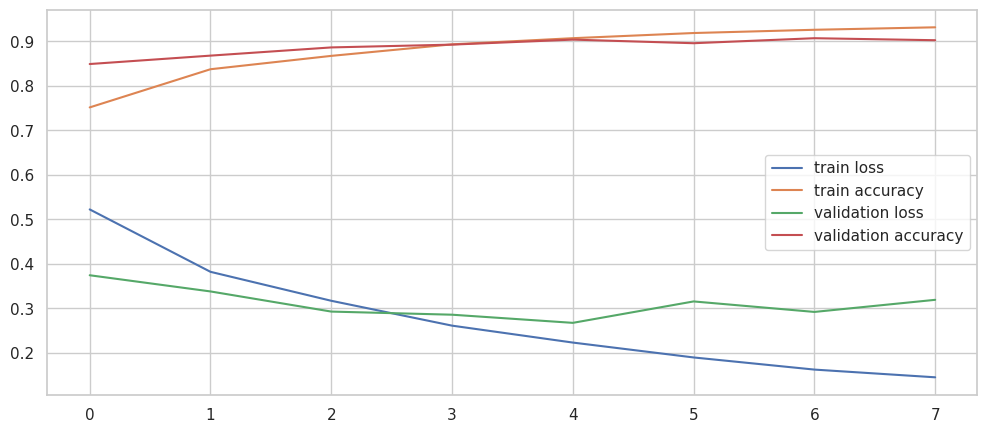

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["binary_accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_binary_accuracy"], label="validation accuracy")
ax.legend()

In [63]:
def CustomDistilBERT(distilbert_model, max_len=128):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')


    logits = distilbert_model([input_ids, attention_masks]).logits
    x0 = keras.layers.Dropout(0.3) (logits)
    x1 = keras.layers.Dense(128, activation="swish",kernel_initializer= "he_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(x0)
    x1 = keras.layers.Dropout(0.1) (x1)
    x2 = keras.layers.Dense(64, activation="swish",kernel_initializer= "he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x1)
    x2 = keras.layers.Dropout(0.2) (x2)
    x3 = keras.layers.Dense(64, activation="swish",kernel_initializer= "he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x2)
    x3 = keras.layers.Dropout(0.2) (x3)

    output = tf.keras.layers.Dense(
    1,
    activation="sigmoid",
    kernel_initializer=keras.initializers.GlorotNormal())(x3)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model


In [66]:
CustomDistilBERT_model = CustomDistilBERT(distilbert_model , 128)
CustomDistilBERT_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6695501   ['input_3[0][0]',             
 e_classification (TFDistil  (loss=None, logits=(None,    0          'input_4[0][0]']             
 BertForSequenceClassificat  2),                                                                  
 ion)                         hidden_states=None, atten                                     

In [67]:
history2 = CustomDistilBERT_model.fit(
        [train_input_ids, train_attention_mask],
        y_train,
        validation_data= ([validation_input_ids,validation_attention_mask],y_validation),
        epochs=10,
        batch_size=32,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                  keras.callbacks.ModelCheckpoint("distilsentiment.h5",monitor = 'val_loss',save_best_only=True)],
        verbose=1
    )

Epoch 1/10
394/394 [==============================] - ETA: 0s - loss: 0.9048 - binary_accuracy: 0.8055

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.



394/394 [==============================] - 204s 467ms/step - loss: 0.9048 - binary_accuracy: 0.8055 - val_loss: 0.7850 - val_binary_accuracy: 0.8787
Epoch 2/10
394/394 [==============================] - 176s 446ms/step - loss: 0.8222 - binary_accuracy: 0.8596 - val_loss: 0.7594 - val_binary_accuracy: 0.8966
Epoch 3/10
394/394 [==============================] - 191s 485ms/step - loss: 0.7534 - binary_accuracy: 0.8857 - val_loss: 0.7459 - val_binary_accuracy: 0.8849
Epoch 4/10
394/394 [==============================] - 177s 450ms/step - loss: 0.7027 - binary_accuracy: 0.9020 - val_loss: 0.7284 - val_binary_accuracy: 0.9097
Epoch 5/10
394/394 [==============================] - 165s 419ms/step - loss: 0.6592 - binary_accuracy: 0.9183 - val_loss: 0.7526 - val_binary_accuracy: 0.8872
Epoch 6/10
394/394 [==============================] - 166s 422ms/step - loss: 0.6243 - binary_accuracy: 0.9270 - val_loss: 0.7436 - val_binary_accuracy: 0.9133
Epoch 7/10
394/394 [==============================]

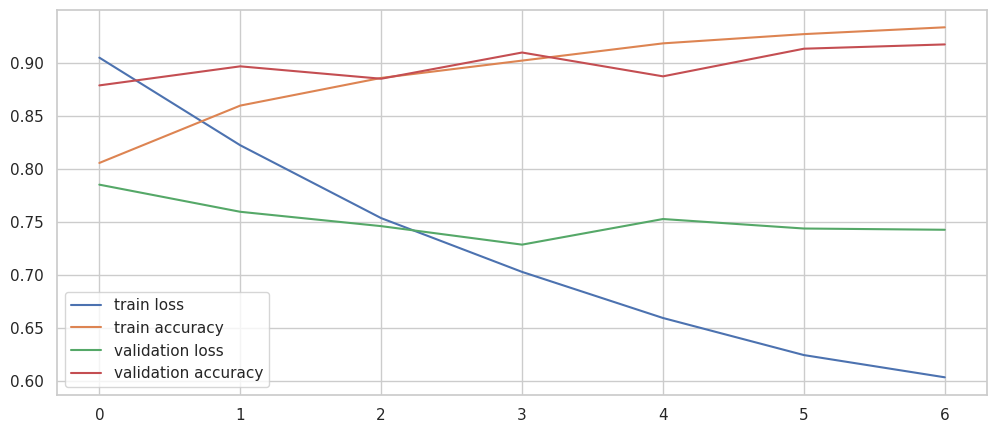

In [68]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history2.history["loss"], label="train loss")
ax.plot(history2.history["binary_accuracy"], label="train accuracy")
ax.plot(history2.history["val_loss"], label="validation loss")
ax.plot(history2.history["val_binary_accuracy"], label="validation accuracy")
ax.legend()

In [71]:
from google.colab import drive
drive.mount('/content/drive')
save_directory = "/content/drive/MyDrive/Models/my_finetuned_Dbert"

CustomDistilBERT_model.save(save_directory , save_format='tf')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
save_weights_path = "/content/drive/MyDrive/Models/my_finetuned_Dbert_weights"
CustomDistilBERT_model.save_weights(save_weights_path)

In [72]:
result_bert = CustomDistilBERT_model.predict([test_input_ids,test_attention_mask])

116/116 [==============================] - 18s 138ms/step


In [90]:
result_bert

array([[0.22769861],
       [0.12590802],
       [0.13738939],
       ...,
       [0.11028456],
       [0.27077872],
       [0.9978605 ]], dtype=float32)

In [77]:
CustomDistilBERT_model.evaluate([test_input_ids,test_attention_mask], y_test, verbose=0)

[0.7181512117385864, 0.9142394661903381]

In [78]:
result_bert_binary = np.round(result_bert).astype(int)

In [91]:
result_bert_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [79]:
def conf_matrix(y_true, y_pred, title):
    """
    Plots the confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        title (str): Title for the plot.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

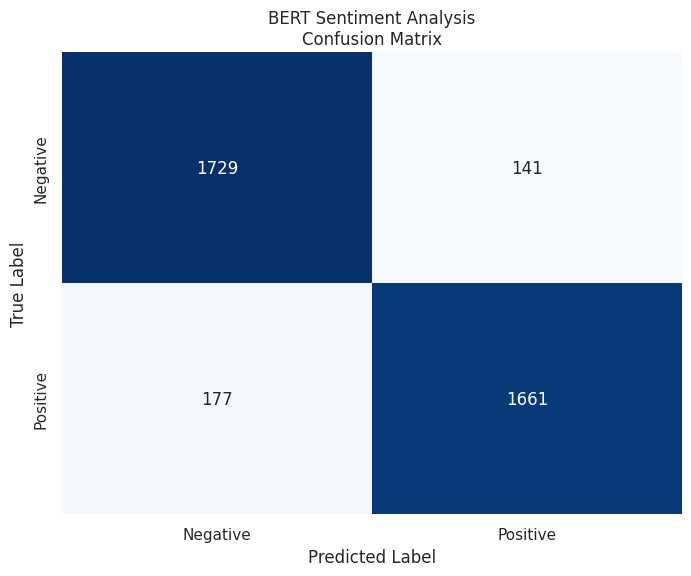

In [80]:
conf_matrix(y_test, result_bert_binary, 'BERT Sentiment Analysis\nConfusion Matrix')

In [96]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, auc, PrecisionRecallDisplay

# Precision و Recall
precision = precision_score(y_test, result_bert_binary)
recall = recall_score(y_test, result_bert_binary)  # Sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, result_bert_binary).ravel()
specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)

# AUC
auc = roc_auc_score(y_test, result_bert_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

Precision: 0.9218
Recall (Sensitivity): 0.9037
Specificity: 0.9246


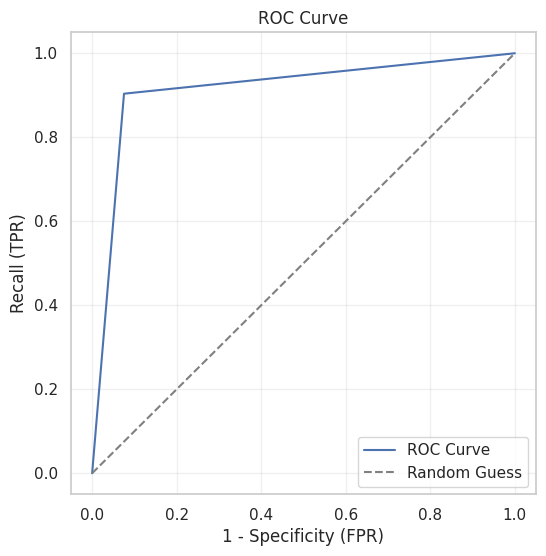

AUC: 0.9141


In [97]:
fpr, tpr, thresholds = roc_curve(y_test, result_bert_binary)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Recall (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
print(f"AUC: {auc:.4f}")

In [100]:
dr_test['y_pred'] = result_bert_binary
dr_test

,Review Text,label,y_pred
9180,thi dress super cute fit tt retail order usual size small fit great everywher howev arm much shorter hit either wrong model pictur veryveri small im aa slim built dress fit arm bunch order medium entir dress would baggi loos fit shift bummer bc super cute also materi loos crochet dress arriv pull sad fa,1,0
19829,fit frustrat l space almost tri everyth first becaus size differ one cut wear jean medium thi bottom still felt look small,0,0
23434,usual follow boho look thi dress appeal immedi wa color want black excit receiv thi knew could wear dress tunic wa outfit consist element tight fit slip fit awkwardli doe give enough room bust waist area overlay dress realli quit pretti wa tight across bust area made entir upper torso ill fit n,0,0
12923,thi top veri cute short love tall divid line color block kept rise bust look weird made look like ill fit matern top go back,0,0
12091,thi top beauti made design materi soft comfort howev veri boxi detail side stick found veri flatter,0,1
...,...,...,...
27589,tri yellow motif unfortun purchas wa quit difficult explain whi work like floral pattern shape sleev textur wa ok usual like cool touch linen thi tshirt wa comfort product made linen wa quit sure wa right onli word could think wa averag person recommend know mayb right tri wear,0,0
11676,bought thi sabl green wear thi blous tuck wear someth lie leg comfort color veri flatter,1,1
25319,order one two size thi dress tri wa hope ultim wear event one petit one style color cut perfect one minor downfal howev zipper dress faulti broke spot dure first time tri cant get either even budg either need take back get fix veri sad thi,0,0
18107,love look thi shirt put wa entir billowi chest end make look larger pregnant,0,0


In [112]:
dr_test[(dr_test['y_pred'] == 0) & (dr_test['label'] == 1)]

,Review Text,label,y_pred
9180,thi dress super cute fit tt retail order usual size small fit great everywher howev arm much shorter hit either wrong model pictur veryveri small im aa slim built dress fit arm bunch order medium entir dress would baggi loos fit shift bummer bc super cute also materi loos crochet dress arriv pull sad fa,1,0
19731,love dog thi sweater rush store buy onc tri like find itchi could deal use tank someth bother wa way arm cut arm look much bigger sadli left store realli cute sweater though,1,0
8695,order thi top grey along white lace back pocket tee tee wa total see veri poor qualiti thi one deliv everi way fact send one back get thi top ivori well lace veri substanti fabric see like mani top day order usual medium come bum like want wear leg see thi stapl thi fir,1,0
19070,tri navi store boy doe run big im normal size small ish xs wa still quit boxi sleev well fit understand thi style like design differ sleev wa buy main fabric wa alreadi pill store look bit cheap sorri,1,0
2810,thi darl littl sweater well made fit true size howev long enough top wa hope thought would pretti high waist trouser sort style way short even highest waist pant skirt show skin think realli onli worn shrug dress someth explain whi model look hunch photo im still,1,0
...,...,...,...
7374,thi subtl classi shirt im lb xs fit perfectli shirt like dont fit snugli back cover poor postur genet make look like stand straight nice,1,0
3076,love collar cut crop im wear tank hole coverag anyway complaint,1,0
20453,usual buy tini shirt know fit thi one beauti ani type chest work im wa way small chest area beauti shirt though im veri sad return work better someon els sure recommend thi beauti shirt someon differ bodi type mine,1,0
21530,saw thi onlin love instantli happen come store tri wa almost perfect sadli busti make dress hang quit well could think thi might better dress less bustyless curvi super cute fun,1,0


In [111]:
dr_test[(dr_test['y_pred'] == 1) & (dr_test['label'] == 0)]

,Review Text,label,y_pred
12091,thi top beauti made design materi soft comfort howev veri boxi detail side stick found veri flatter,0,1
4719,im tunic lover ill usual take chanc im usu size medium order small instead usual medium sinc review said run small thi hit mid thigh good tunic length overal fit overs like swimsuit cover rather nice blous realli best way sum overs swimsuit coverup like top im go exchang xs think even larg,0,1
20918,bought great altern black jean head back textur nice let call thin leg worth price opinion honestli cant seem find pair pilcro like id spent extra money better pair black jean,0,1
16976,normal wear medium everyth bet xs wouldv mayb fit thi top billowi fit,0,1
24087,im normal retail dress go size get button across chest close lay properli without feel like would bust definit ani kind chest,0,1
...,...,...,...
10044,thi sweater ok love love love bell sleev thought sure thi would perfect thought would great sweater transit winter spring onc arriv knew return sleev onli bell veri long sweater fit chunki midsect like sweater flowi like fittedstyl sweater bit roomi would like thi onc also bit itchi mebut im rather sensit id love thi,0,1
22350,tri thi normal sp found run littl snug necklin wa way low everyday wear,0,1
7338,love way thi top look pictur embroideri love appearsveri detail subtl cheap look special earlier review note top seethrough plu drawback though mean return thi top fabric veri heavi doe drape well small woman larg chest order size top still loos even size rel stiff fabric give,0,1
21883,saw onlin great qualiti sweater dress review seemingli extra fabric easi fix seamstress veri sensit skin wear long sleev sweater wool angora mohair xsp tt lengtharm lot extra fabric width tri wa itchi,0,1


In [118]:
dr[3076:3077]

,Recommended IND,Rating,Review Text,text_word_count,sentimentanalysis
3185,1,5,"Love the collar, cut is cropped but i'm wearing a tank under for hole coverage anyways. no complaints!",18,positive


In [123]:
import joblib
joblib.dump(CustomDistilBERT, '/content/drive/MyDrive/Models/sentiment_model_v1.pkl')


['/content/drive/MyDrive/Models/sentiment_model_v1.pkl']